# jn1

In [1]:
import numpy as np
import pandas as pd

import os
#os.sys.path
import sys
sys.path.append('../src')

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
#import src.code1_data as go

In [9]:
ruta = "../../inp1_fer2013.csv"
image_size = (48,48)

In [10]:
df_fer= pd.read_csv("../../inp1_fer2013.csv", encoding = "ISO-8859-1")

In [11]:
df_test = pd.read_csv("../../inp1_test.csv", encoding = "ISO-8859-1")

In [12]:
df_train = pd.read_csv("../../inp1_train.csv", encoding = "ISO-8859-1")

In [24]:
emotions= ('angry','disgust','fear','happy','sad','surprise','neutral')

In [25]:
df_fer['emotion_name']= df_fer.emotion.apply(lambda x: emotions[x])

In [13]:
df_fer['pixar1'] = [[float(x) for x in each.split()] for each in df_fer['pixels']]
df_fer['pixar2'] = df_fer['pixar1'].apply(lambda x: np.asarray(x).reshape(48,48)).apply(lambda x:x.astype('float32'))

In [15]:
df_fer['arrays'] = df_fer.pixar2.copy()

In [16]:
drpp = ['pixar1','pixar2']
df_fer.drop(columns = drpp, inplace=True)

In [ ]:
#df_fer['pixarexpanded'] = np.expand_dims(df_fer.pixar2,axis=-1)

In [17]:
df_fer.head()

,emotion,pixels,Usage,arrays
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
df_fer.arrays[0].shape

In [ ]:
df_fer.arrays[0]

In [ ]:
#df_fer['arraytest'] = df_fer['arrays'].apply(lambda x: np.array([[[c] for c in i] for i in x]))

In [ ]:
#df_fer['arraytest'][0].shape

In [ ]:
#df_fer['arraytest'][0]

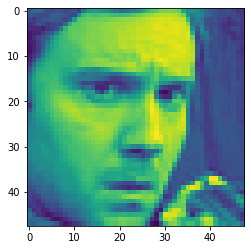

In [18]:
plt.imshow(df_fer.arrays[0])


In [ ]:
#plt.imshow(df_fer['arraytest'][0])

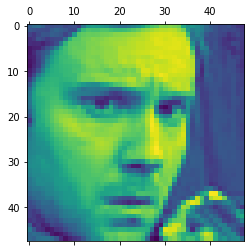

In [19]:
plt.matshow(df_fer.arrays[0],fignum=0)

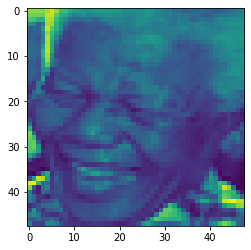

In [20]:
plt.imshow(df_fer['arrays'][12346])

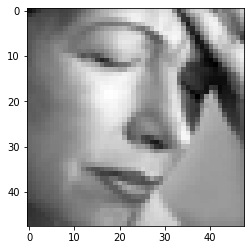

In [21]:
plt.imshow(df_fer['arrays'][12345], cmap='gray')

In [ ]:
#https://stackoverflow.com/questions/24739769/matplotlib-imshow-plots-different-if-using-colormap-or-rgb-array

In [26]:
df_fer.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [27]:
df_fer['emotion_name'].value_counts()

happy       8989
neutral     6198
sad         6077
fear        5121
angry       4953
surprise    4002
disgust      547
Name: emotion_name, dtype: int64

In [22]:
df_fer.shape

(35887, 4)

In [28]:
dum = pd.get_dummies(df_fer['emotion_name'])

In [29]:
df_fer = df_fer.join(dum)

In [30]:
df_fer.head()

,emotion,pixels,Usage,arrays,emotion_name,angry,disgust,fear,happy,neutral,sad,surprise
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",angry,1,0,0,0,0,0,0
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",angry,1,0,0,0,0,0,0
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",fear,0,0,1,0,0,0,0
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",sad,0,0,0,0,0,1,0
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",neutral,0,0,0,0,1,0,0


In [31]:
df_fer['dums'] = df_fer[['angry','disgust','fear','happy','sad','surprise','neutral']].apply(lambda x: pd.Series([x.values]), axis=1)

In [33]:
df_fer.dums.head()

0    [1, 0, 0, 0, 0, 0, 0]
1    [1, 0, 0, 0, 0, 0, 0]
2    [0, 0, 1, 0, 0, 0, 0]
3    [0, 0, 0, 0, 1, 0, 0]
4    [0, 0, 0, 0, 0, 0, 1]
Name: dums, dtype: object

In [34]:
X = (np.stack(df_fer['arrays'])) / 255.0
y = np.stack(df_fer.dums)
X.shape, y.shape

((35887, 48, 48), (35887, 7))

In [35]:
X[0]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157, 0.16862746,
        0.16078432],
       [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295, 0.21960784,
        0.16862746],
       [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 , 0.27450982,
        0.18039216],
       [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628, 0.42745098,
        0.32156864]], dtype=float32)

In [45]:
# CRIS: todo lo de abajo, nada.

In [ ]:
# https://appliedmachinelearning.blog/2018/11/28/demonstration-of-facial-emotion-recognition-on-real-time-video-using-cnn-python-keras/

In [ ]:
df1 = df_fer.copy()

In [ ]:
series_one = pd.Series(df1.pixels)


In [ ]:
series_one.shape

In [ ]:
series_two=series_one.to_string()

In [ ]:
series_two.split()

In [ ]:
len(series_two)

In [ ]:
type(df1.iloc[:, 1])

In [ ]:
trt = df1.iloc[:,[1]]

In [39]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            col = line.split(',')
            
            Y.append(int(col[0]))
            X.append([int(p) for p in col[1].split()])
    
    X, Y = np.array(X)/255.0, np.array(Y)
    return X, Y

#  X, Y = np.array(X)/ 255.0, np.array(Y)

In [40]:
X2,y2=getData(ruta)

In [41]:
y2.shape

(35887,)

In [42]:
X2.shape

(35887, 2304)

In [43]:
fernandito=X2[0].reshape(48,48)

In [44]:
fernandito

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157, 0.16862745,
        0.16078431],
       [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294, 0.21960784,
        0.16862745],
       [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471, 0.2745098 ,
        0.18039216],
       [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627, 0.42745098,
        0.32156863]])

In [ ]:
plt.imshow(fernandito)